In [30]:
import pandas as pd
import numpy as np
custom_df=pd.read_csv("D:\ims proschool\classification\employee.csv")

In [31]:
custom_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [32]:
custom_new=custom_df.drop(['EmployeeCount',
       'EmployeeNumber','Over18','StandardHours'],axis=1)

In [33]:
custom_new.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [34]:
custom_new.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
en=LabelEncoder()

In [37]:
custom_new['Attrition']=en.fit_transform(custom_new['Attrition'])

In [38]:
custom_new['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [39]:
custom_new_obj=custom_new.select_dtypes(include='O')

In [40]:
custom_new_num=custom_new.select_dtypes(include=[np.number])

In [41]:
custom_new_obj_dum=pd.get_dummies(custom_new_obj,drop_first=True)

In [42]:
merge_custom=pd.concat([custom_new_num,custom_new_obj_dum],axis=1)

In [43]:
merge_custom.shape

(1470, 45)

In [44]:
from sklearn.model_selection import train_test_split

In [58]:
train_data_X=merge_custom.drop(['Attrition'],axis=1)
train_data_Y=merge_custom['Attrition']

In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(train_data_X,train_data_Y,test_size=0.2,random_state=100)

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dc=DecisionTreeClassifier()


In [62]:
dc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [63]:
pred=dc.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [66]:
print('Accuracy',accuracy_score(Y_test,pred))

Accuracy 0.7517006802721088


In [67]:
print('confusion matrix',confusion_matrix(Y_test,pred))

confusion matrix [[202  45]
 [ 28  19]]


In [68]:
print('precision',precision_score(Y_test,pred))

precision 0.296875


In [69]:
print('recall',recall_score(Y_test,pred))

recall 0.40425531914893614


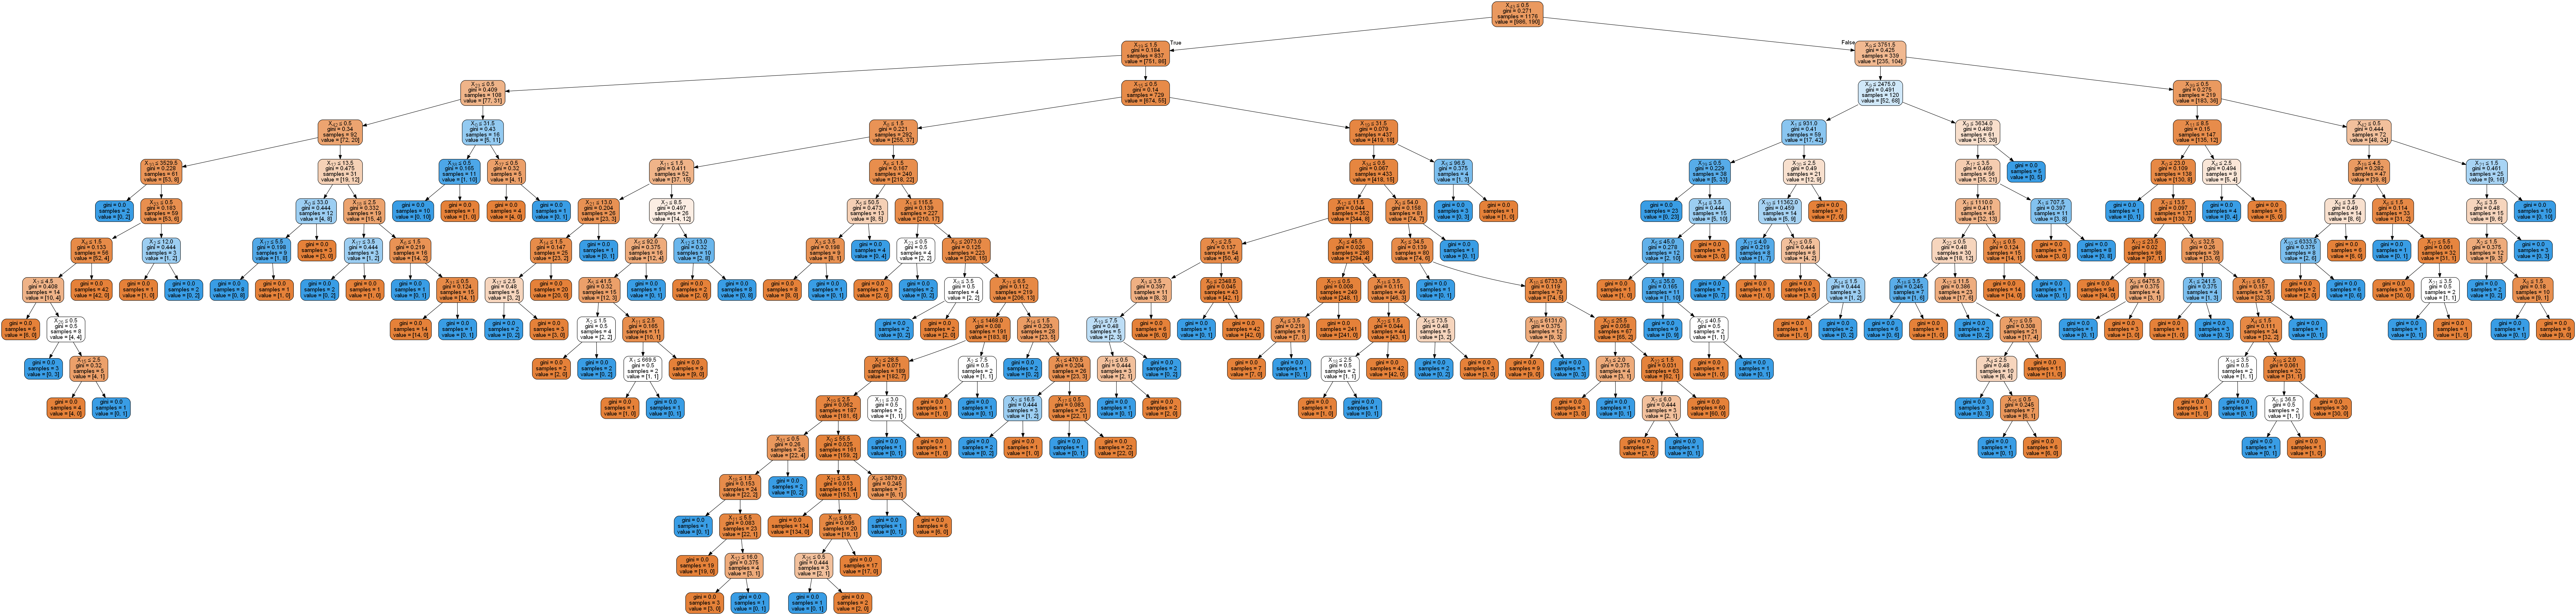

In [75]:
import graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data= StringIO()
export_graphviz(dc,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph= pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())
